In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from models.HH import *
from models.LIF import * 
from models.Ishikevich import *
from models.morrislecar import *
from utils.load import *
import matplotlib.animation as animation

In [2]:
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)

## Let's just do efficiency and fix it

In [3]:
def phases(data,dt):
    points1 = np.zeros(len(data[:,0]))
    points2 = np.zeros(len(data[:,1]))
    num_points1 = 0
    num_points2 = 0
    for i in range(1,len(data)-2):
        if  (data[i-1,0] < data[i,0] and data[i,0] > data[i+1,0] ) or (data[i-1,0] > data[i,0] and data[i,0] < data[i+1,0]):
            points1[num_points1] = i * dt
            num_points1 = num_points1 +1
        if  (data[i-1,1] < data[i,1] and data[i,1] > data[i+1,1] ) or (data[i-1,1] > data[i,1] and data[i,1] < data[i+1,1]):
            points2[num_points2] = i * dt
            num_points2 = num_points2 +1
        if points1[num_points1] < points2[num_points2]:
            points2[num_points2] = 0
            num_points2 = num_points2 -1
    time_dif = 0
    if len(points1) != len(points2):
        print('error')
    for i in range(0,num_points1-1):
        time_dif = time_dif + (points1[i] - points2[i])
    time_dif = time_dif/num_points1
    return abs(time_dif),float(points1[i])

In [4]:
params_HH = load_HH()
params_LIF = load_LIF()
params_IZH = load_ISH()
params_ML = load_ML()

k = 0.012
k_izh = 0.04
k_ML = 0.008

Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1

y0 = [-70,-70]
u0 = [0.0,0.0]

w0 = [0.0007223855976593603, 0.0007223855976593603]


#Initial conditions of the HH model important quantities
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 

order = 2

HH

In [5]:
t_final = 4000
dt = 0.01
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0


data_HH_total_1 = np.zeros((len(f),len(t)))
data_HH_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 1 + 0.7*np.sin(2 * np.pi * f[i] * t)
    data4b_HH, completeHH_4b = rk_simplemodel(dt,t_final,1,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)
    data_HH_total_1[i] = data4b_HH[:,0]
    data_HH_total_2[i] = data4b_HH[:,1]

    end = len(data4b_HH)
    if i < 9:
        mean[i] = ( np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]) ) / ( np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]) )
        print(np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]), np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]))
        time_diff, residue = phases(data4b_HH[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff

    else:
        mean[i] = ( np.max(data4b_HH[80000:end-1,1]) - np.min(data4b_HH[80000:end-1,1]) ) / ( np.max(data4b_HH[80000:end-1,0]) - np.min(data4b_HH[80000:end-1,0]) )
        time_diff, residue = phases(data4b_HH[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff

f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100

fHH = f
meanHH = mean 
phasesHH = phases_test

1.4317290498213424 13.387680880548302
1.4267236086652275 13.355695528017591
1.4191893235632165 13.308305731690737
1.4079493090322188 13.23892339406963
1.3913034739034629 13.138346215776465
1.366805961534027 12.993701586650296
1.3309994246119317 12.787092923044469
1.2792258718635168 12.494277116091197
1.2058841799966018 12.08455619364809


LIF

In [6]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
y0 = [-70,-70]
residue = 0

data_IF_total_1 = np.zeros((len(f),len(t)))
data_IF_total_2 = np.zeros((len(f),len(t)))

for i in range(0,len(f)):
    I[:,0] = 1+ np.sin(2 * np.pi * f[i] * t)
    data4b_IF, complete_IF_4b = rk_if(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,1)
    end = len(data4b_IF)
    data_IF_total_1[i] = data4b_IF[:,0]
    data_IF_total_2[i] = data4b_IF[:,1]

    if i < 9:
        mean[i] = ( np.max(data4b_IF[10000:,1]) - np.min(data4b_IF[10000:,1]) ) / ( np.max(data4b_IF[10000:,0]) - np.min(data4b_IF[10000:,0]) )
        time_diff, residue = phases(data4b_IF[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
    else:
        mean[i] = ( np.max(data4b_IF[80000:end-1,1]) - np.min(data4b_IF[80000:end-1,1]) ) / ( np.max(data4b_IF[80000:end-1,0]) - np.min(data4b_IF[80000:end-1,0]) )
        time_diff, residue = phases(data4b_IF[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff

f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100
fIF= f 
meanIF = mean 
phasesIF = phases_test

IZH

In [7]:

t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0

data_IZH_total_1 = np.zeros((len(f),len(t)))
data_IZH_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 1.0 + 0.5*np.sin(2 * np.pi * f[i] * t)
    #data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,C,I,Is,vr,vt,k_ish,a,b,c,d,k_2,tau,vpeak)
    data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)
    end = len(data4b_Ish)
    data_IZH_total_1[i] = data4b_Ish[:,0]
    data_IZH_total_2[i] = data4b_Ish[:,1]

    if i < 9:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish[10000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
    else:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish,dt)
        phases_test[i] = 360 * f[i] * time_diff
f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]
    #print(mean[0],mean[i])

mean[0] = 100

fISH = f
meanISH = mean 
phasesISH= phases_test

ML

In [8]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
mean = np.zeros((len(f),1))
residue = 0
phases_test = np.zeros((len(f),1))

data_ML_total_1 = np.zeros((len(f),len(t)))
data_ML_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 0.3 + 0.4*np.sin(2 * np.pi * f[i] * t)
    data4b_ML, complete_ML_4b = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)
    end = len(data4b_ML)
    data_ML_total_1[i] = data4b_ML[:,0]
    data_ML_total_2[i] = data4b_ML[:,1]
    if i < 9:
        mean[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )
        time_diff, residue = phases(data4b_ML[5000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
    elif i == 9:
        mean[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )
        time_diff, residue = phases(data4b_ML[70000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
    else:
        mean[i] = ( np.max(data4b_ML[10000:end-1,1]) - np.min(data4b_ML[10000:end-1,1]) ) / ( np.max(data4b_ML[10000:end-1,0]) - np.min(data4b_ML[10000:end-1,0]) )
        time_diff, residue = phases(data4b_ML[72000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]


mean[0] = 100
fML= f 
meanML = mean 
phasesML= phases_test

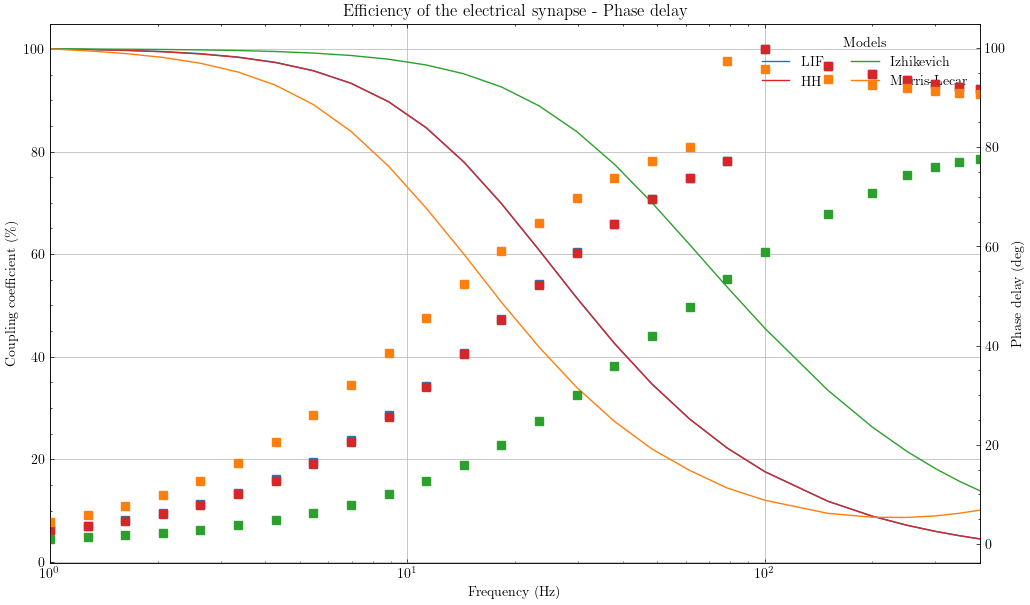

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Phase delay')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient (\%)')
ax1.set_xlim(1,400)

ax2.set_ylabel('Phase delay (deg)')

ax2.plot(fIF,phasesIF, 's', color = 'tab:blue')
ax2.plot(fHH,phasesHH, 's', color = 'tab:red')
ax2.plot(fISH,phasesISH, 's', color = 'tab:green')
ax2.plot(fML,phasesML, 's', color = 'tab:orange')

ax1.plot(fIF,meanIF, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,meanHH, color = 'tab:red',label= 'HH')
ax1.plot(fISH, meanISH,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,meanML, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2)
ax1.grid()

(3000.0, 3100.0)

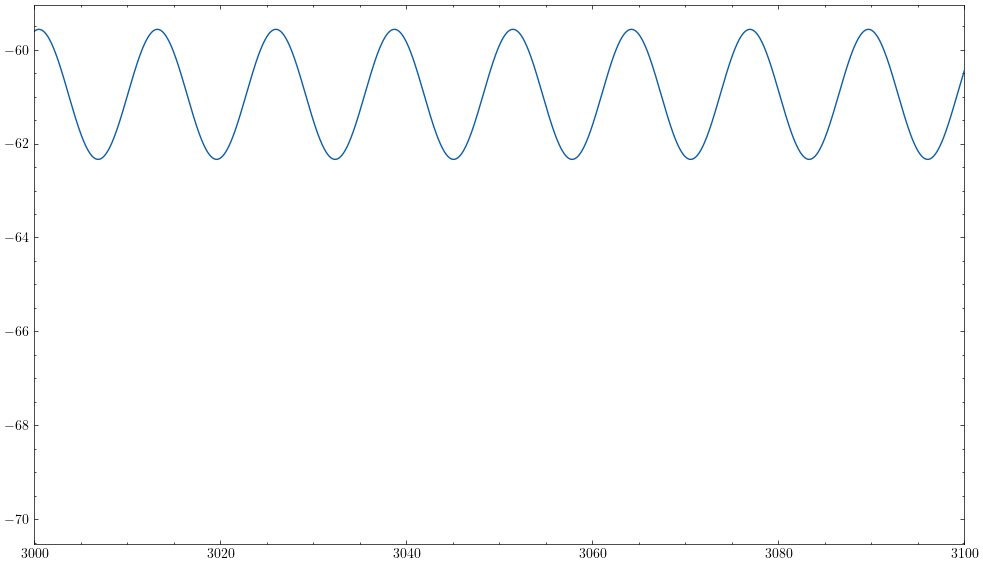

In [14]:
time = np.linspace(0,t_final,int(t_final/dt))
plt.plot(time,data_HH_total_1[18,:])
plt.xlim(3000,3100)
#plt.plot(time,data_HH_total_1[20,:])
#plt.plot(time,data_IZH_total_2[20,:])
#plt.plot(time,data_HH_total_2[20,:])